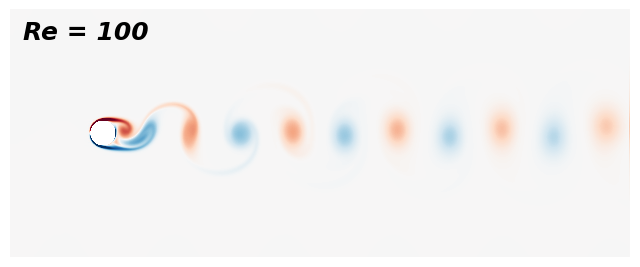

In [11]:
import vtk
import numpy as np
import matplotlib.pyplot as plt
from vtk.util.numpy_support import vtk_to_numpy


def load_vti(path: str, what: str | list[str]) -> dict[str, np.ndarray]:
    match what:
        case str():
            what = [what]
        case list():
            pass
        case _:
            raise TypeError()

    img = vtk.vtkXMLImageDataReader()
    img.SetFileName(path)
    img.Update()

    out = img.GetOutput()
    row, col, _ = out.GetDimensions()
    ptd = out.GetPointData()

    def load_dat(what: str):
        dat = vtk_to_numpy(ptd.GetScalars(what))
        cmp = 1 if np.ndim(dat) == 1 else dat.shape[1]
        dat = dat.reshape((col, row, cmp))[1:-1, 1:-1]
        return dat

    return {w: load_dat(w) for w in what}


def do_plot(i: int, show: bool = False):
    reno = [100]

    fig = plt.figure(figsize=(8, 4))
    ax1 = fig.add_subplot(1, 1, 1)

    axes = [ax1]
    for re, ax in zip(reno, axes):

        path = f"./vortex_street/re{re}/checkpoint_vtk.vti"
        data = load_vti(path, ["Vorticity", "Density", "Velocity", "CellType"])

        vort = data["Vorticity"]
        vel = data["Velocity"]
        cell = data["CellType"].astype(np.int8)
        vmag = np.sqrt(np.sum(vel**2, axis=-1))

        vort = np.squeeze(vort)
        vel = np.squeeze(vel)
        cell = np.squeeze(cell)

        vmag = np.where(cell == 1, np.nan, vmag)
        vort = np.where(cell == 1, np.nan, vort)

        from matplotlib.colors import LinearSegmentedColormap, ListedColormap

        my_cm = LinearSegmentedColormap(
            "my_cm",
            {
                "red": [
                    (0.0, 0.9, 0.9),
                    (0.4, 0.5, 0.5),
                    (0.5, 0.0, 0.0),
                    (0.6, 0.5, 0.5),
                    (1.0, 0.9, 0.9),
                ],
                "green": [
                    (0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.0),
                    (0.6, 0.4, 0.4),
                    (1.0, 0.8, 0.8),
                ],
                "blue": [
                    (0.0, 0.7, 0.7),
                    (0.4, 0.35, 0.35),
                    (0.5, 0.1, 0.1),
                    (1.0, 0.0, 0.0),
                ],
            },
        )

        cm = plt.cm.inferno
        # cm = my_cm

        ax.imshow(vmag, interpolation="none", vmin=0, vmax=2, cmap=cm)
        # ax.contour(vort, levels=[-500, -250, -125, -75, 75, 125, 250, 500], colors='k', linewidths=0.5)
        # uu, vv = np.meshgrid(range(vel.shape[1]), range(vel.shape[0]))
        # ax.streamplot(uu, vv, vel[:, :, 0], vel[:, :, 1], color="k", linewidth=0.5)

        ax.imshow(vort, interpolation="none", vmin=-500, vmax=500, cmap=plt.cm.RdBu)

        ax.annotate(
            f"Re = {re:,d}",
            (40, 90),
            fontsize=18,
            fontfamily="sans-serif",
            fontstyle="italic",
            fontweight="bold",
            c="k",
        )  #

    plt.axis("off")

    if show:
        plt.show()
    else:
        plt.savefig(f"foo.png", dpi=200, bbox_inches="tight", pad_inches=0)


do_plot(600, show=False)

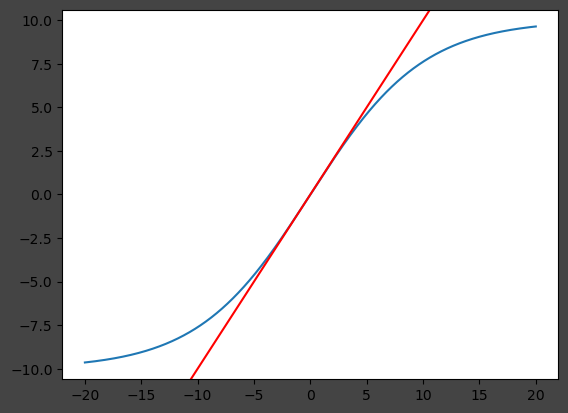

In [19]:
plt.figure(facecolor="#444444")
x = np.linspace(-20, 20, 1000)
s = 10
y = np.tanh(x / s) * s
plt.plot(x, y)
plt.axline((0, 0), slope=1, color="r")
plt.show()

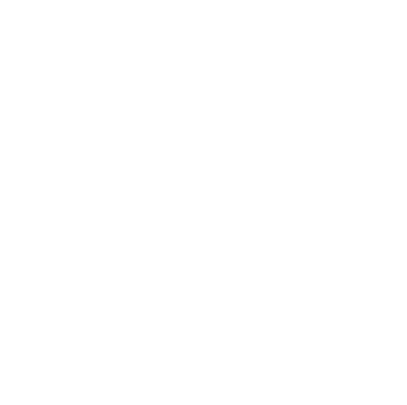

In [43]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(5, 5), facecolor="none")
plt.axis("off")
t = np.linspace(0, 2 * np.pi, 1000)
x = np.cos(t)
y = np.sin(t)
plt.plot(x, y, linewidth=25, color="w")
x = np.linspace(-1, 1, 1000)
y = np.sin(3 * x * np.pi) * np.exp(-((2 * x) ** 2))
y *= 0.8
m = (x**2 + y**2) > 0.93
x[m] = np.nan
y[m] = np.nan
plt.plot(x, y, linewidth=25, color="w")
plt.savefig("foo.svg", bbox_inches="tight", pad_inches=0)
plt.show()